# NAC - Games

In [1]:
## Import OpenCV, Matplot and Numpy libs
%matplotlib inline
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np

## Check OpenCV version
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.5.1 


##### R1 - NOTA 6: Segmenta ou filtra os círculos maiores da imagem baseado em cores ou canais da imagem ou por exemplos com contornos e produz output visual. Exibe a área e o centro de massa da imagem. Use circulo.png. Essa rubrica pode ser feito no jupyter notebook ou google Colab.

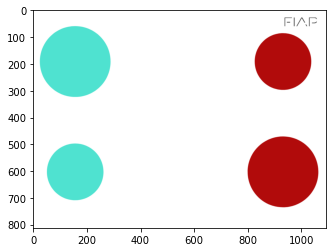

In [2]:
circles = cv2.imread("circulos.png")
circles_rgb = cv2.cvtColor(circles, cv2.COLOR_BGR2RGB)
circles_hsv = cv2.cvtColor(circles, cv2.COLOR_BGR2HSV)
plt.imshow(circles_rgb, vmin=0, vmax=255); plt.show()

Separando as cores

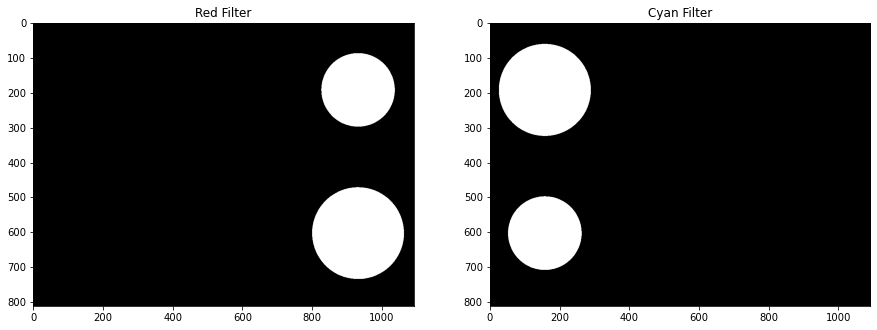

In [3]:
# HSV color mask for red color
red_lower_hsv = np.array([0, 200, 85])  
red_upper_hsv = np.array([30, 255, 255])

# HSV color mask for cyan color
cyan_lower_hsv = np.array([70, 100, 100]) 
cyan_upper_hsv = np.array([90, 210, 255])

# Apply masks
red_mask = cv2.inRange(circles_hsv, red_lower_hsv, red_upper_hsv)
cyan_mask = cv2.inRange(circles_hsv, cyan_lower_hsv, cyan_upper_hsv)

# Show results
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1).title.set_text('Red Filter')
plt.imshow(red_mask, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 2, 2).title.set_text('Cyan Filter')
plt.imshow(cyan_mask, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

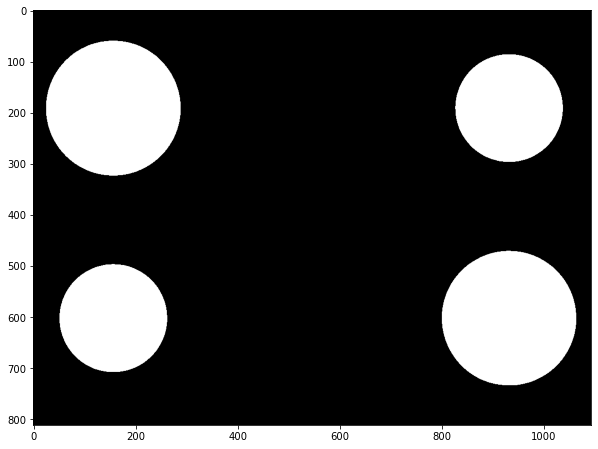

In [4]:
# Apply masks
mask = cv2.bitwise_or(red_mask, cyan_mask) 

# Show results
fig = plt.figure(figsize=(10,10))
plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

###### Detect Circles

In [5]:
def drawCenterOfMass(img, cX,cY, size, color):
     cv2.line(img, (cX - size,cY), (cX + size,cY), color, 2)
     cv2.line(img, (cX,cY - size), (cX, cY + size), color, 2) 

In [6]:
def writeImageText(img, text, origem, color):
     font = cv2.FONT_HERSHEY_DUPLEX
     cv2.putText(img, str(text), origem, font,1.2,color,2,cv2.LINE_AA)

In [7]:
def drawContour(mask):
    contour, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 

    contour_img = mask_rgb.copy()

    big = None
    big_area = 0

    for c in contour:
        area = cv2.contourArea(c)
        if area > big_area:
            big_area = area
            big = c

    M = cv2.moments(big)
    
    if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(contour_img, [big], -1, [0, 255, 0], 5)
           
    return contour_img, big_area, cX, cY

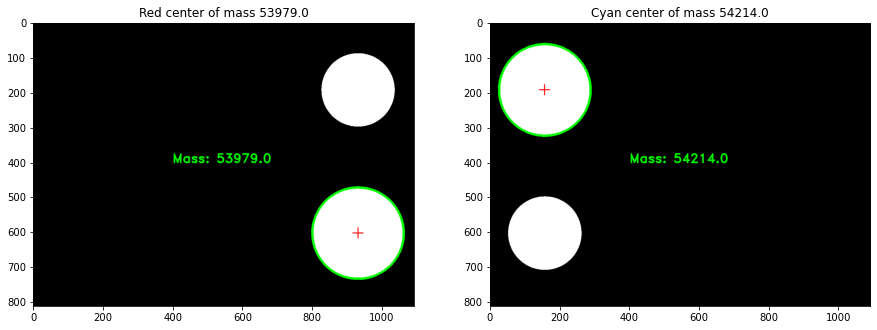

In [8]:
# Get Contours and Mass
image_red, mass_red, cX_red, cY_red = drawContour(red_mask)
image_cyan, mass_cyan, cX_cyan, cY_cyan = drawContour(cyan_mask)

# Draw Center of Mass
drawCenterOfMass(image_red, cX_red, cY_red, 15, (255, 0, 0))
drawCenterOfMass(image_cyan, cX_cyan, cY_cyan, 15, (255, 0, 0))

# Write Mass Text 
writeImageText(image_red, f'Mass: {mass_red}', (400, 400), (0,255,0))
writeImageText(image_cyan, f'Mass: {mass_cyan}', (400, 400), (0,255,0))

# Show images
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1).title.set_text(f'Red center of mass {mass_red}')
plt.imshow(image_red, cmap="Greys_r", vmin=0, vmax=255)

plt.subplot(1, 2, 2).title.set_text(f'Cyan center of mass {mass_cyan}')
plt.imshow(image_cyan, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

##### R2 - NOTA 8: Faz o R1, Detecta o contorno dos círculos com a transformada de hough, traça uma reta entre os dois centros dos círculos e calcula o ângulo de inclinação da reta em relação o plano horizontal e exibe esse resultado. Essa rubrica pode ser feito jupyter notebook ou google Colab.

In [9]:
def drawContourFilter(image, mask):
    contour, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    big = None
    big_area = 0

    for c in contour:
        area = cv2.contourArea(c)
        if area > big_area:
            big_area = area
            big = c

    M = cv2.moments(big)
    
    if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.drawContours(image, [big], -1, [0, 255, 0], 5)
            
    return big_area, cX, cY

In [10]:
def drawLine(img, x, y, x2, y2):
     cv2.line(img, (x, y),(x2, y2), (0, 0, 255), thickness=3, lineType=8)

In [11]:
def getAngle(img, point1, point2):
    angRadian = math.atan2(point1[1]-point2[1], point1[0]-point2[0]) # Angulos em Radianos
    angDegree = round(math.degrees(angRadian)) # Angulos em Grau

    cv2.putText(img, str(angDegree), (point1[0], point1[1]), cv2.FONT_HERSHEY_COMPLEX, 1.2, (0,0,255), 2)

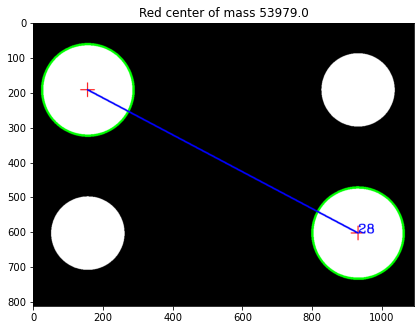

In [12]:
mask_copy = mask.copy()
mask_copy = cv2.cvtColor(mask_copy, cv2.COLOR_GRAY2RGB)

# Get Contours and Mass
mass_red, cX_red, cY_red = drawContourFilter(mask_copy, red_mask)
mass_cyan, cX_cyan, cY_cyan = drawContourFilter(mask_copy, cyan_mask)

# Draw Center of Mass
drawCenterOfMass(mask_copy, cX_red, cY_red, 20, (255, 0, 0))
drawCenterOfMass(mask_copy, cX_cyan, cY_cyan, 20, (255, 0, 0))

# Draw Line
drawLine(mask_copy, cX_red, cY_red, cX_cyan, cY_cyan)

# Draw Angle
getAngle(mask_copy, (cX_red, cY_red), (cX_cyan, cY_cyan))

# Show images
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1).title.set_text(f'Red center of mass {mass_red}')
plt.imshow(mask_copy, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

##### R3 - NOTA 10: Faz o R2, realiza o processamento com imagens da webcam (executa um programa .py) e controla um jogo, emulando o pressionamento das teclas em função do ângulo de inclinação (ângulo positivo vira para direita, ângulo negativo vira para esquerda se for um jogo de corrida). 

In [13]:
## File: cvGameController.py